In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import glob
import math

In [2]:
path = r'C:\Users\khanf\Documents\PROJECT\GOOG_1HOUR_ddt51z'
all_files = glob.glob(path + "/*.csv")
li = []
index = ["DATETIME", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "NUMBER OF TRADES", "WEIGHTED AV. PRICE"]
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=index)
    li.append(df)

google = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [3]:
google.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE
0,2014.03.27 09:30:00,566.47,566.47,558.34,551.51,8,8,560.765932
1,2014.03.27 10:00:00,560.01,561.85,559.79,559.79,12,12,560.583425
2,2014.03.27 11:00:00,560.33,560.33,551.43,551.43,18,17,554.755161
3,2014.03.27 12:00:00,551.70,556.64,555.60,551.70,9,9,554.783086
4,2014.03.27 13:00:00,557.08,560.33,557.49,557.08,13,13,558.598783


In [4]:
# msft = pd.DataFrame(msft.DATETIME.str.split(' ',1).tolist(),
#                                    columns = ['DATE','TIME'])
google[['DATE','TIME']] = google.DATETIME.str.split(expand=True)
google[["YEAR", "MONTH", "DAY"]] = google.DATE.str.split(".", expand=True)

In [5]:
google.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY
0,2014.03.27 09:30:00,566.47,566.47,558.34,551.51,8,8,560.765932,2014.03.27,09:30:00,2014,03,27
1,2014.03.27 10:00:00,560.01,561.85,559.79,559.79,12,12,560.583425,2014.03.27,10:00:00,2014,03,27
2,2014.03.27 11:00:00,560.33,560.33,551.43,551.43,18,17,554.755161,2014.03.27,11:00:00,2014,03,27
3,2014.03.27 12:00:00,551.70,556.64,555.60,551.70,9,9,554.783086,2014.03.27,12:00:00,2014,03,27
4,2014.03.27 13:00:00,557.08,560.33,557.49,557.08,13,13,558.598783,2014.03.27,13:00:00,2014,03,27


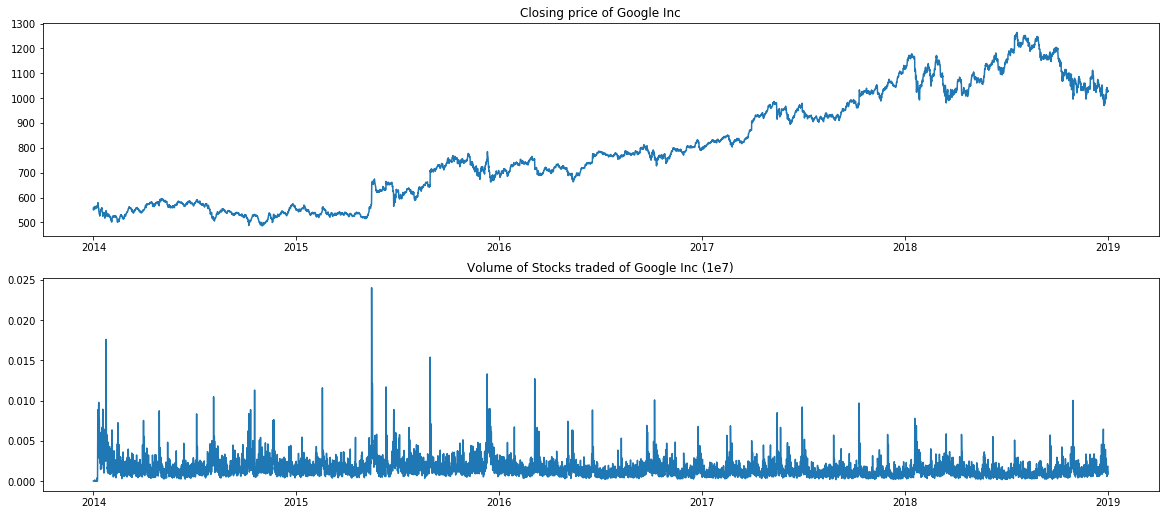

In [9]:
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.width', 1500)
# pd.set_option('display.max_columns', 100)
fig,ax=plt.subplots(2,1,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
date = np.linspace(2014, 2019, num = 8367)
ax[0].plot(date, google['CLOSE'])
ax[0].set_title('Closing price of Google Inc')

ax[1].plot(date, google['VOLUME']/1000000)
ax[1].set_title('Volume of Stocks traded of Google Inc (1e7)')


plt.show()